In [1]:
import pandas as pd
import numpy as np
import math
import tushare as ts

In [2]:
db = ts.get_hist_data('600000',start='2016-01-01',end='2017-01-01')
db

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2016-12-30,16.07,16.23,16.21,16.04,122621.67,0.14,0.87,16.152,16.226,16.676,127406.56,130038.50,186986.43,0.06
2016-12-29,16.09,16.15,16.07,15.99,118513.08,-0.02,-0.12,16.148,16.271,16.720,125258.04,132307.70,197803.28,0.06
2016-12-28,16.14,16.19,16.09,16.03,144415.27,-0.05,-0.31,16.172,16.334,16.774,124553.81,151266.00,201102.24,0.07
2016-12-27,16.25,16.32,16.14,16.13,106658.24,-0.11,-0.68,16.218,16.443,16.827,120948.37,154685.03,203948.99,0.05
2016-12-26,16.13,16.28,16.25,16.01,144824.56,0.06,0.37,16.246,16.546,16.885,144668.36,159622.07,213381.12,0.07
2016-12-23,16.17,16.22,16.19,16.07,111879.06,0.00,0.00,16.300,16.670,16.933,132670.43,193499.17,223057.54,0.05
2016-12-22,16.32,16.33,16.19,16.14,114991.90,-0.13,-0.80,16.394,16.785,16.978,139357.35,211146.91,229131.20,0.06
2016-12-21,16.26,16.37,16.32,16.25,126388.09,0.04,0.25,16.496,16.880,17.013,177978.19,212882.29,233903.17,0.06
2016-12-20,16.52,16.56,16.28,16.12,225258.17,-0.24,-1.45,16.668,16.955,17.044,188421.68,215794.23,250101.98,0.11


In [51]:
def get_SMA(prices,dates,n=20):
    MA = []
    for i in range(0,len(dates)):
        if i < len(prices)-n:
            MA.append(sum(prices[i:i+n])/n)
        else:
            MA.append(sum(prices[i:])/len(prices[i:]))
    MA = pd.Series(MA,index = dates)
    return MA

In [52]:
MA20 = get_SMA(db.close,db.index)

In [53]:
MA20

date
2016-12-30    16.675500
2016-12-29    16.719500
2016-12-28    16.773500
2016-12-27    16.827000
2016-12-26    16.885000
2016-12-23    16.933000
2016-12-22    16.977500
2016-12-21    17.013000
2016-12-20    17.044000
2016-12-19    17.063500
2016-12-16    17.070000
2016-12-15    17.067000
2016-12-14    17.062000
2016-12-13    17.033000
2016-12-12    17.003500
2016-12-09    16.959000
2016-12-08    16.922000
2016-12-07    16.893000
2016-12-06    16.862500
2016-12-05    16.826000
2016-12-02    16.782500
2016-12-01    16.747500
2016-11-30    16.708000
2016-11-29    16.659500
2016-11-28    16.610000
2016-11-25    16.562500
2016-11-24    16.525500
2016-11-23    16.490500
2016-11-22    16.459500
2016-11-21    16.447000
                ...    
2016-03-16    17.150500
2016-03-15    17.129000
2016-03-14    17.172500
2016-03-11    17.199000
2016-02-15    17.223000
2016-02-05    17.154000
2016-02-04    17.109500
2016-02-03    17.128000
2016-02-02    17.202500
2016-02-01    17.262500
2016-01-29 

In [43]:
def get_boll(prices,dates,n=20):
    ma = get_SMA(prices,dates)
    up_band = []
    low_band = []
    mid_band = ma[:-n]
    for i in range(0,len(prices)-n):
        var = sum(pow((prices[i:i+n]-ma[i:i+n]),2))/n
        std = pow(var,0.5)
        up_band.append(ma[i] + std*2)
        low_band.append(ma[i] - std*2)
    up_band = pd.Series(up_band,index = mid_band.index)
    low_band = pd.Series(low_band,index = mid_band.index)
    return up_band,mid_band,low_band

In [9]:
db.close[0:20] - db.ma20[0:20]

date
2016-12-30   -0.466
2016-12-29   -0.650
2016-12-28   -0.684
2016-12-27   -0.687
2016-12-26   -0.635
2016-12-23   -0.743
2016-12-22   -0.788
2016-12-21   -0.693
2016-12-20   -0.764
2016-12-19   -0.544
2016-12-16   -0.410
2016-12-15   -0.367
2016-12-14    0.118
2016-12-13    0.137
2016-12-12    0.486
2016-12-09    0.381
2016-12-08    0.218
2016-12-07    0.177
2016-12-06    0.337
2016-12-05    0.474
dtype: float64

In [14]:
pow(sum(pow((db.close[0:20] - db.ma20[0:20]),2))/20,0.5)

0.5314845717422095

In [54]:
boll1,boll2,boll3 = get_boll(db.close,db.index)

In [55]:
boll1


date
2016-12-30    16.834955
2016-12-29    16.866953
2016-12-28    16.898934
2016-12-27    16.930126
2016-12-26    16.967805
2016-12-23    17.000209
2016-12-22    17.025993
2016-12-21    17.044103
2016-12-20    17.064278
2016-12-19    17.073727
2016-12-16    17.076438
2016-12-15    17.071672
2016-12-14    17.065461
2016-12-13    17.036346
2016-12-12    17.006694
2016-12-09    16.960583
2016-12-08    16.922871
2016-12-07    16.893684
2016-12-06    16.863073
2016-12-05    16.826252
2016-12-02    16.782500
2016-12-01    16.747500
2016-11-30    16.708000
2016-11-29    16.659500
2016-11-28    16.610000
2016-11-25    16.562500
2016-11-24    16.525500
2016-11-23    16.490500
2016-11-22    16.459500
2016-11-21    16.447000
                ...    
2016-04-14    17.828000
2016-04-13    17.839500
2016-04-12    17.804000
2016-04-11    17.766000
2016-04-08    17.731000
2016-04-07    17.773500
2016-04-06    17.808000
2016-04-05    17.774000
2016-04-01    17.696500
2016-03-31    17.625500
2016-03-30 

In [56]:
boll2

date
2016-12-30    16.6755
2016-12-29    16.7195
2016-12-28    16.7735
2016-12-27    16.8270
2016-12-26    16.8850
2016-12-23    16.9330
2016-12-22    16.9775
2016-12-21    17.0130
2016-12-20    17.0440
2016-12-19    17.0635
2016-12-16    17.0700
2016-12-15    17.0670
2016-12-14    17.0620
2016-12-13    17.0330
2016-12-12    17.0035
2016-12-09    16.9590
2016-12-08    16.9220
2016-12-07    16.8930
2016-12-06    16.8625
2016-12-05    16.8260
2016-12-02    16.7825
2016-12-01    16.7475
2016-11-30    16.7080
2016-11-29    16.6595
2016-11-28    16.6100
2016-11-25    16.5625
2016-11-24    16.5255
2016-11-23    16.4905
2016-11-22    16.4595
2016-11-21    16.4470
               ...   
2016-04-14    17.8280
2016-04-13    17.8395
2016-04-12    17.8040
2016-04-11    17.7660
2016-04-08    17.7310
2016-04-07    17.7735
2016-04-06    17.8080
2016-04-05    17.7740
2016-04-01    17.6965
2016-03-31    17.6255
2016-03-30    17.5540
2016-03-29    17.5050
2016-03-28    17.4610
2016-03-25    17.4225
2016-

In [57]:
boll3

date
2016-12-30    16.516045
2016-12-29    16.572047
2016-12-28    16.648066
2016-12-27    16.723874
2016-12-26    16.802195
2016-12-23    16.865791
2016-12-22    16.929007
2016-12-21    16.981897
2016-12-20    17.023722
2016-12-19    17.053273
2016-12-16    17.063562
2016-12-15    17.062328
2016-12-14    17.058539
2016-12-13    17.029654
2016-12-12    17.000306
2016-12-09    16.957417
2016-12-08    16.921129
2016-12-07    16.892316
2016-12-06    16.861927
2016-12-05    16.825748
2016-12-02    16.782500
2016-12-01    16.747500
2016-11-30    16.708000
2016-11-29    16.659500
2016-11-28    16.610000
2016-11-25    16.562500
2016-11-24    16.525500
2016-11-23    16.490500
2016-11-22    16.459500
2016-11-21    16.447000
                ...    
2016-04-14    17.828000
2016-04-13    17.839500
2016-04-12    17.804000
2016-04-11    17.766000
2016-04-08    17.731000
2016-04-07    17.773500
2016-04-06    17.808000
2016-04-05    17.774000
2016-04-01    17.696500
2016-03-31    17.625500
2016-03-30 

In [3]:
import myfun

In [4]:
SMA20 = myfun.get_SMA(db.close,db.index)
SMA20

date
2016-12-30    16.675500
2016-12-29    16.719500
2016-12-28    16.773500
2016-12-27    16.827000
2016-12-26    16.885000
2016-12-23    16.933000
2016-12-22    16.977500
2016-12-21    17.013000
2016-12-20    17.044000
2016-12-19    17.063500
2016-12-16    17.070000
2016-12-15    17.067000
2016-12-14    17.062000
2016-12-13    17.033000
2016-12-12    17.003500
2016-12-09    16.959000
2016-12-08    16.922000
2016-12-07    16.893000
2016-12-06    16.862500
2016-12-05    16.826000
2016-12-02    16.782500
2016-12-01    16.747500
2016-11-30    16.708000
2016-11-29    16.659500
2016-11-28    16.610000
2016-11-25    16.562500
2016-11-24    16.525500
2016-11-23    16.490500
2016-11-22    16.459500
2016-11-21    16.447000
                ...    
2016-03-16    17.150500
2016-03-15    17.129000
2016-03-14    17.172500
2016-03-11    17.199000
2016-02-15    17.223000
2016-02-05    17.154000
2016-02-04    17.109500
2016-02-03    17.128000
2016-02-02    17.202500
2016-02-01    17.262500
2016-01-29 

In [5]:
bollup,bollmid,bolllow = myfun.get_boll(db.close,db.index)

In [8]:
bolllow

date
2016-12-30    16.516045
2016-12-29    16.572047
2016-12-28    16.648066
2016-12-27    16.723874
2016-12-26    16.802195
2016-12-23    16.865791
2016-12-22    16.929007
2016-12-21    16.981897
2016-12-20    17.023722
2016-12-19    17.053273
2016-12-16    17.063562
2016-12-15    17.062328
2016-12-14    17.058539
2016-12-13    17.029654
2016-12-12    17.000306
2016-12-09    16.957417
2016-12-08    16.921129
2016-12-07    16.892316
2016-12-06    16.861927
2016-12-05    16.825748
2016-12-02    16.782500
2016-12-01    16.747500
2016-11-30    16.708000
2016-11-29    16.659500
2016-11-28    16.610000
2016-11-25    16.562500
2016-11-24    16.525500
2016-11-23    16.490500
2016-11-22    16.459500
2016-11-21    16.447000
                ...    
2016-04-14    17.828000
2016-04-13    17.839500
2016-04-12    17.804000
2016-04-11    17.766000
2016-04-08    17.731000
2016-04-07    17.773500
2016-04-06    17.808000
2016-04-05    17.774000
2016-04-01    17.696500
2016-03-31    17.625500
2016-03-30 

In [6]:
show_data = pd.DataFrame(index = bollup.index)
show_data['bollup'] = bollup
show_data['bollmid'] = bollmid
show_data['bolllow'] = bolllow
show_data['close'] = db.close[:-20]

In [8]:
show_data

,bollup,bollmid,bolllow,close
date,,,,
2016-12-30,16.834955,16.6755,16.516045,16.21
2016-12-29,16.866953,16.7195,16.572047,16.07
2016-12-28,16.898934,16.7735,16.648066,16.09
2016-12-27,16.930126,16.8270,16.723874,16.14
2016-12-26,16.967805,16.8850,16.802195,16.25
2016-12-23,17.000209,16.9330,16.865791,16.19
2016-12-22,17.025993,16.9775,16.929007,16.19
2016-12-21,17.044103,17.0130,16.981897,16.32
2016-12-20,17.064278,17.0440,17.023722,16.28


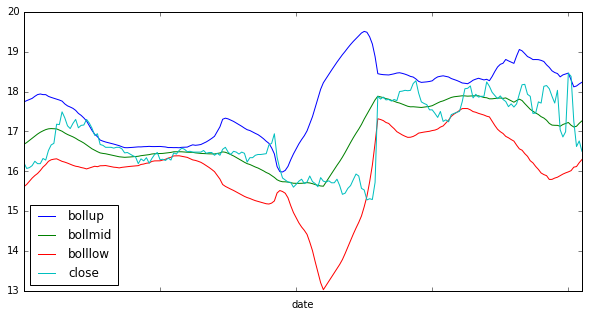

In [9]:
import matplotlib.pyplot as plt
show_data.plot(figsize=(10,5))
plt.show()

In [8]:
import matplotlib.pyplot as plt